In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# đọc dữ liệu
df = pd.read_csv('data/location_rev.csv')

In [10]:
# xem các thông tin mô tả ban đầu về dữ liệu

In [11]:
# xem info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   float64
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   float64
 4   population_density   1000 non-null   float64
 5   location_age         1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [8]:
df.tail()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
996,46689.11,3.0,28278.48,961.0,3335.0,16.0
997,34826.87,4.0,27801.73,1914.0,2507.0,14.0
998,28618.06,3.0,35481.50,1294.0,1731.0,10.0
999,40226.41,4.0,29218.30,1932.0,4410.0,13.0
1000,39093.23,4.0,34785.80,2803.0,4270.0,8.0


## Simple Linear Regression

In [12]:
# dựa vào 1 biến input để dự đoán revenue

In [13]:
# xem hệ số tương quan giữa các thuộc tính
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [14]:
# lựa chọn median_income do có hệ số tương quan cao nhất

In [15]:
# kiểm tra xem sử dụng model linear có phù hợp để dự đoán revenue dựa vào median_income hay không?

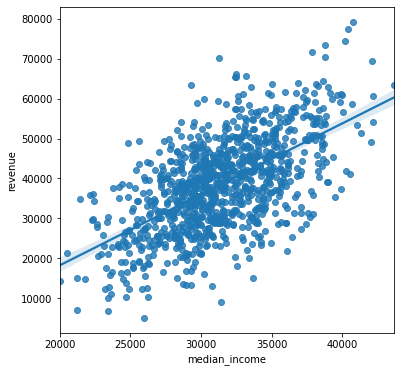

In [16]:
# sử dụng regression plot
plt.figure(figsize = (6,6))
sns.regplot(data=df, x='median_income', y='revenue')
plt.show()

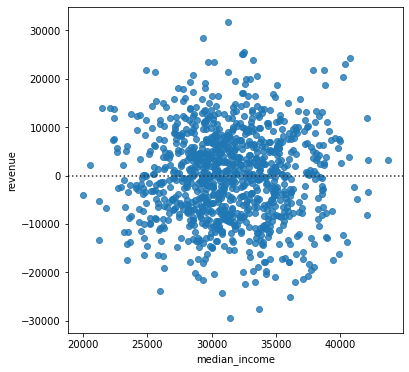

In [17]:
# sữ dụng residual plot
plt.figure(figsize = (6,6))
sns.residplot(data=df, x='median_income', y='revenue')
plt.show()

In [18]:
# mô hình hồi quy có thể sử dụng để dự đoán revenue dựa vào median_income

In [19]:
# bước 1: Lựa chọn thuật toán --> LinearRegression
from sklearn.linear_model import LinearRegression

In [54]:
# bước 2: chuẩn bị tập X và y
X = df[['median_income']]
y = df['revenue']

In [21]:
# bước 3: tách dữ liệu train và test --> sử dụng thư viện train_test_split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 12) # mặc định 75:25

In [32]:
# bước 4: huấn luyện model với dữ liệu train

In [33]:
# khởi tạo model với LinearRegression
model = LinearRegression()

In [34]:
# fit model với dữ liệu train
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# bước 5: kiểm tra model với dự liệu test

In [36]:
yhat_test = model.predict(X_test)

In [37]:
# kiểm tra hệ số a và b trong công thức y = a + bx
a = model.intercept_
b = model.coef_[0]
print(a, b)

-16939.310958008922 1.769111648107495


In [38]:
# revenue = -16939.310958008922 + 1.769111648107495 x median_income

In [35]:
# bước 6: đánh giá model 

In [39]:
# đo giá trị R^2 (R-squared) trên train và test
print('R-squared train dataset:', model.score(X_train, y_train))
print('R-squared test dataset:', model.score(X_test, y_test))

R-squared train dataset: 0.3594855146050385
R-squared test dataset: 0.3723478516096116


In [40]:
# R^2 cả trên train và test đều thấp ==> model bị underfitting
# giải pháp: bổ sung thêm thuộc tính input

In [41]:
# đo giá trị MSE, RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
yhat_train = model.predict(X_train)

In [43]:
print('MSE train dataset:', mean_squared_error(y_train, yhat_train))
print('MSE test dataset:', mean_squared_error(y_test, yhat_test))

MSE train dataset: 86361107.07020618
MSE test dataset: 88138959.9655217


In [44]:
print('RMSE train dataset:', mean_squared_error(y_train, yhat_train, squared=False))
print('RMSE test dataset:', mean_squared_error(y_test, yhat_test, squared=False))

RMSE train dataset: 9293.06768888542
RMSE test dataset: 9388.235189082221


In [46]:
print('MAE train dataset:', mean_absolute_error(y_train, yhat_train))
print('MAE test dataset:', mean_absolute_error(y_test, yhat_test))

MAE train dataset: 7419.439892934232
MAE test dataset: 7641.295917406638


In [47]:
# trực quan hóa kết quả dự đoán
# vẽ thêm 1 đường thẳng tham chiếu có độ dốc 1. Nếu tất cả các điểm đều nằm trên đường tha8a3ng 
# này có nghĩa là có một mối quan hệ hoàn hảo giữa giá trị thực tế và giá trị dự đoán

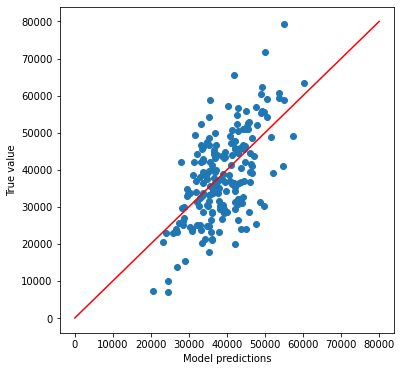

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(yhat_test, y_test)
plt.plot([0, 80000], [0, 80000], 'r-')
plt.xlabel("Model predictions")
plt.ylabel("True value")
plt.show()

## Multiple Linear Regression

In [55]:
# dự đoán revenue dựa vào num_competitors, median_income, num_loyalty_members, population_density và
# location_age
X2 = df.drop(columns=['revenue'])
y2 = df['revenue']

In [57]:
# tách dữ liệu train và test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=12)

In [58]:
# huấn luyện model với dữ liệu train
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [59]:
yhat_test = model2.predict(X2_test)

In [61]:
# kiểm tra hệ số a và b trong công thức y = a + b1x1 + b2x2 + b3x3 + b4x4 + b5x5
a = model2.intercept_
b = model2.coef_
print(a, b)

-49923.65918228092 [-2.12437444e+03  1.72281658e+00  3.34702138e+00  4.05404615e+00
  2.04400680e+03]


In [62]:
# đánh giá model 

In [63]:
# đo giá trị R^2 (R-squared) trên train và test
print('R-squared train dataset:', model2.score(X2_train, y2_train))
print('R-squared test dataset:', model2.score(X2_test, y2_test))

R-squared train dataset: 0.8137755645523757
R-squared test dataset: 0.8102107100827328


In [64]:
yhat_train = model2.predict(X2_train)

In [65]:
print('RMSE train dataset:', mean_squared_error(y_train, yhat_train, squared=False))
print('RMSE test dataset:', mean_squared_error(y_test, yhat_test, squared=False))

RMSE train dataset: 5010.867923084653
RMSE test dataset: 5162.502813893461


In [66]:
# nhận xét:
# R^2 trên train và test đều khá cao > 80%
# MSE đã giảm nhiều so với với Simple Linear
# --> chọn model multiple linear

In [67]:
# dự đoán trên bộ dữ lieu mới
X_new = pd.DataFrame({
    'num_competitors': [3, 5], 
    'median_income': [30000, 500000], 
    'num_loyalty_members': [1200, 1400], 
    'population_density': [2000, 3000], 
    'location_age': [10, 15]
})

In [68]:
yhat_new = model2.predict(X_new)
yhat_new

array([ 27952.30089455, 848370.82930284])

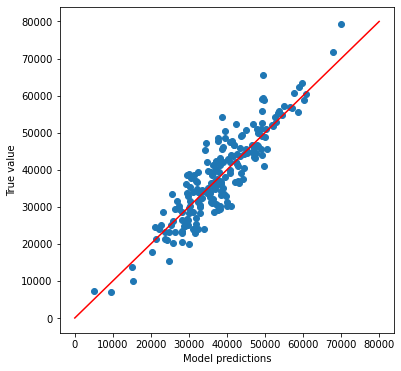

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(yhat_test, y2_test)
plt.plot([0, 80000], [0, 80000], 'r-')
plt.xlabel("Model predictions")
plt.ylabel("True value")
plt.show()

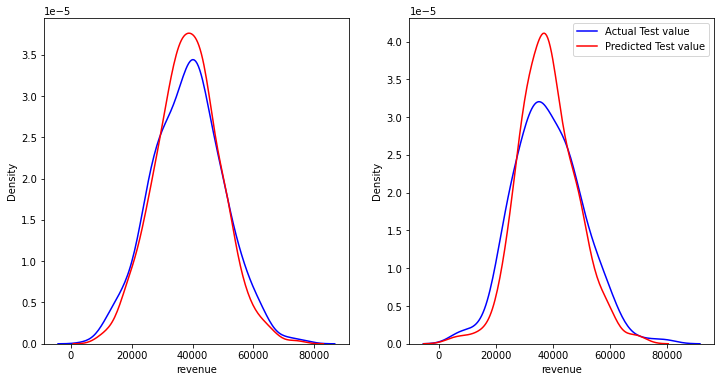

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(y2_train, hist=False, color='b', label='Actual Train value')
sns.distplot(yhat_train, hist=False, color='r', label='Predicted Train value')

plt.subplot(1,2,2)
sns.distplot(y2_test, hist=False, color='b', label='Actual Test value')
sns.distplot(yhat_test, hist=False, color='r', label='Predicted Test value')
plt.legend()
plt.show()

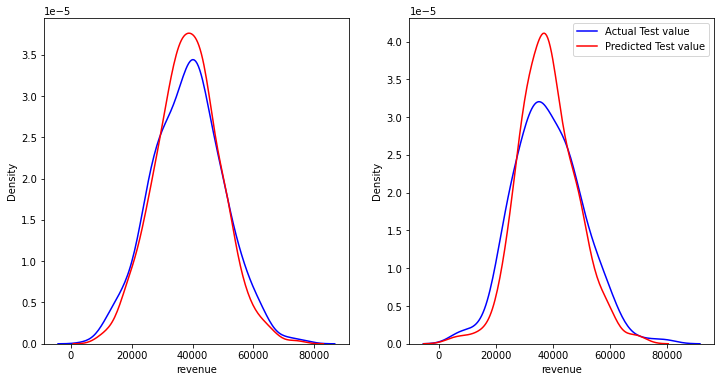

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(y2_train,  color='b', label='Actual Train value')
sns.kdeplot(yhat_train, color='r', label='Predicted Train value')

plt.subplot(1,2,2)
sns.kdeplot(y2_test, color='b', label='Actual Test value')
sns.kdeplot(yhat_test, color='r', label='Predicted Test value')
plt.legend()
plt.show()